In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


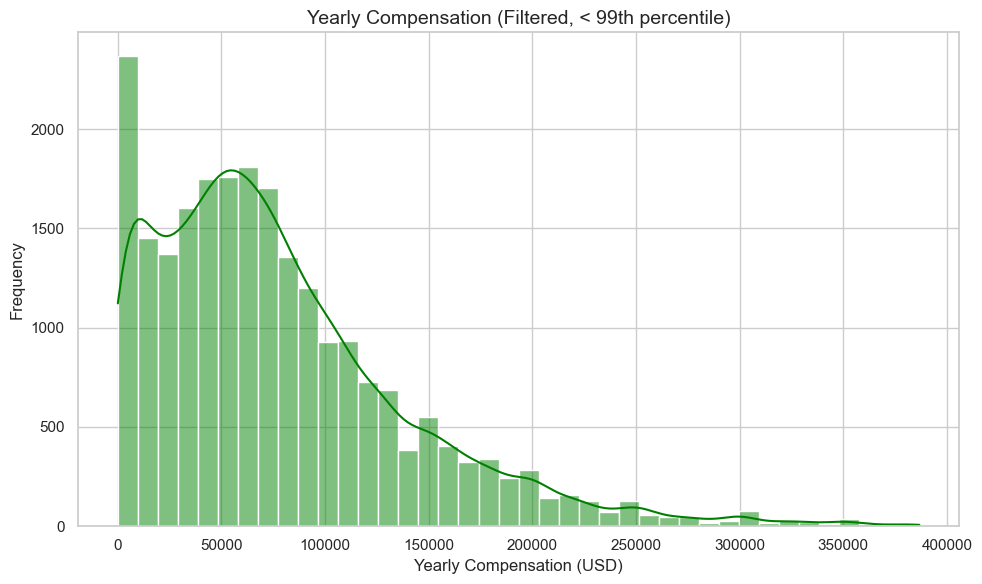

In [8]:
# Filter out extreme outliers (e.g., top 1%)
filtered_data = comp_data[comp_data < comp_data.quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, bins=40, kde=True, color='green')
plt.title('Yearly Compensation (Filtered, < 99th percentile)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
# Filter the data where Employment status is "Employed, full-time"
full_time_df = df[df['Employment'] == "Employed, full-time"]

# Drop missing compensation values
full_time_comp = full_time_df['ConvertedCompYearly'].dropna()

# Calculate the median
median_compensation = full_time_comp.median()

print(f"Median Yearly Compensation for Full-Time Employed Respondents: ${median_compensation:,.2f}")


Median Yearly Compensation for Full-Time Employed Respondents: $69,814.00


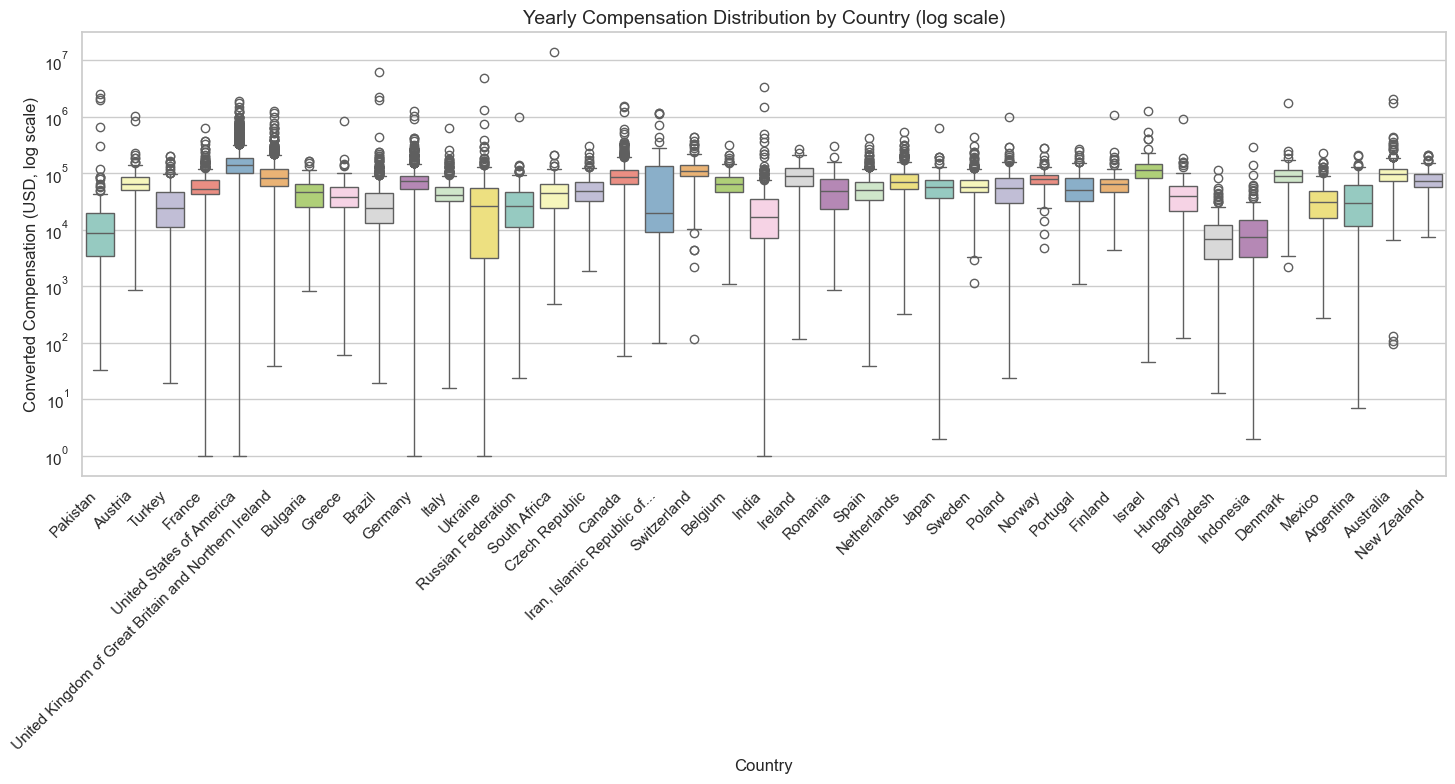

In [12]:
# Drop missing values from required columns
df_filtered = df[['Country', 'ConvertedCompYearly']].dropna()

# Filter countries with sufficient responses (e.g., >100)
top_countries = df_filtered['Country'].value_counts()[df_filtered['Country'].value_counts() > 100].index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

# Set visual style
sns.set(style="whitegrid")

# Create the boxplot (with hue fix)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_filtered, x='Country', y='ConvertedCompYearly', hue='Country', palette='Set3', legend=False)
plt.yscale('log')  # Log scale to handle outliers
plt.xticks(rotation=45, ha='right')
plt.title('Yearly Compensation Distribution by Country (log scale)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Converted Compensation (USD, log scale)')
plt.tight_layout()
plt.show()

In [13]:
# Drop missing values from ConvertedCompYearly
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df_clean[
    (df_clean['ConvertedCompYearly'] >= lower_bound) &
    (df_clean['ConvertedCompYearly'] <= upper_bound)
]

# Display the shape of the new DataFrame
print("Original dataset shape:", df_clean.shape)
print("Refined dataset shape (no outliers):", df_no_outliers.shape)


Original dataset shape: (23435, 114)
Refined dataset shape (no outliers): (22457, 114)


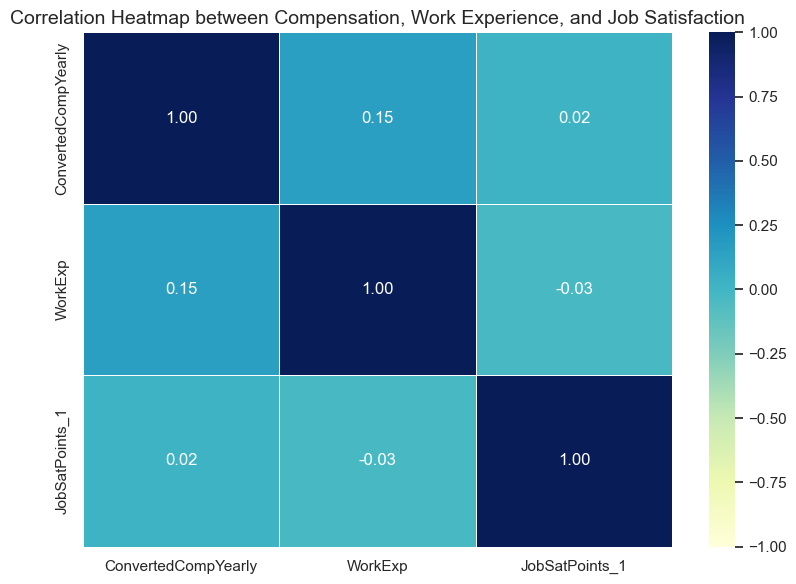

In [15]:
# Drop rows with missing values in the relevant columns
df_filtered = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Set the plot style
sns.set(style="white")

# Create a heatmap with a new color palette (YlGnBu)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Compensation, Work Experience, and Job Satisfaction', fontsize=14)
plt.tight_layout()
plt.show()

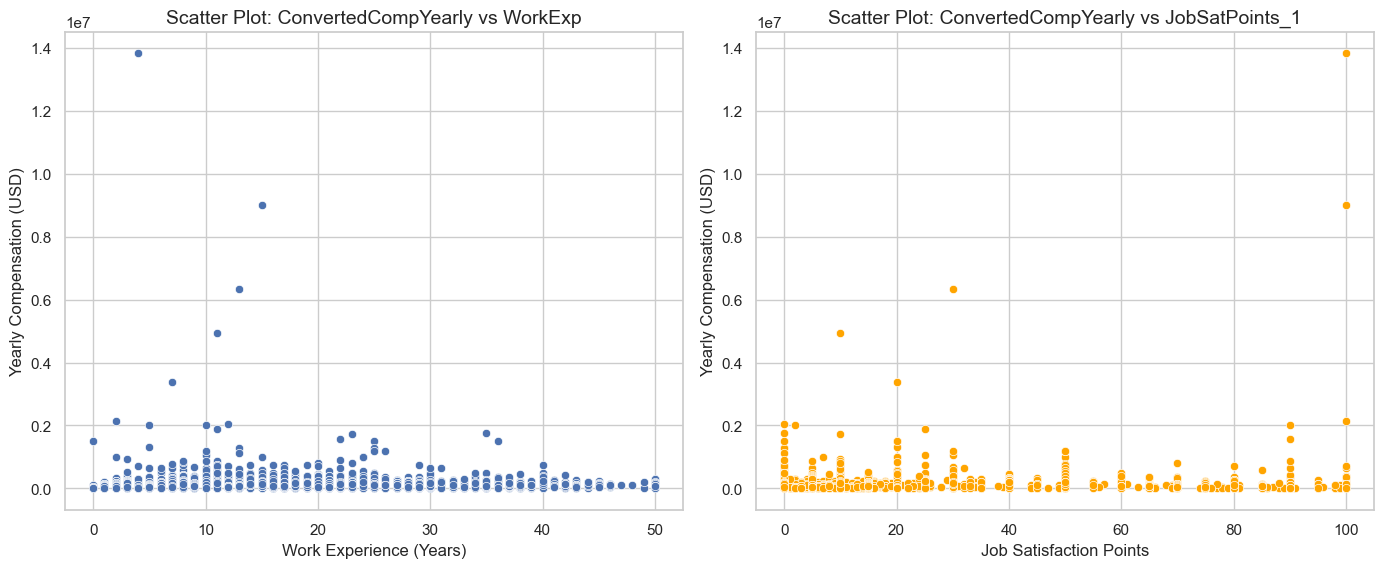

In [17]:
# Drop rows with missing values in the relevant columns
df_filtered = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Set plot style
sns.set(style="whitegrid")

# Create the first scatter plot (ConvertedCompYearly vs WorkExp)
plt.figure(figsize=(14, 6))

# Scatter plot for ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_filtered, color='b')
plt.title('Scatter Plot: ConvertedCompYearly vs WorkExp', fontsize=14)
plt.xlabel('Work Experience (Years)', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Scatter plot for ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_filtered, color='orange')
plt.title('Scatter Plot: ConvertedCompYearly vs JobSatPoints_1', fontsize=14)
plt.xlabel('Job Satisfaction Points', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Show both plots
plt.tight_layout()
plt.show()

In [18]:
# Calculate the median of ConvertedCompYearly
median_compensation = df['ConvertedCompYearly'].median()

print(f"Median Yearly Compensation: {median_compensation}")


Median Yearly Compensation: 65000.0
